<a href="https://colab.research.google.com/github/minzeros/codestates_section_project/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Name : 게임의 이름입니다.
Platform : 게임이 지원되는 플랫폼의 이름입니다.
Year : 게임이 출시된 연도입니다.
Genre : 게임의 장르입니다.
Publisher : 게임을 제작한 회사입니다.
NA_Sales : 북미지역에서의 출고량입니다.
EU_Sales : 유럽지역에서의 출고량입니다.
JP_Sales : 일본지역에서의 출고량입니다.
Other_Sales : 기타지역에서의 출고량입니다.

In [ ]:
import pandas as pd

In [ ]:
# vgames2 데이터셋 load

games = pd.read_csv('/content/vgames2.csv')
games = games.loc[:,'Name':]
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 원본데이터의 결측치 확인

games.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# copy 데이터 만든 후, 결측치 모두 삭제

df = games.copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
# '_Sales' 컬럼에 있는 'M' 문자 삭제
# '_Sales' 컬럼에 있는 'K' 문자 삭제 후 M(million) 단위로 바꾸기 (* 0.001)

sales_feature = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for col in sales_feature:
    df[col] = df[col].str.replace('M', '')
    df[col] = df[col].str.replace('K','*0.001', regex=True).map(pd.eval)

In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
# '_Sales' 컬럼에 10^6 곱하기

for col in sales_feature:
  df[col] = (df[col] * 1e6).astype(int)

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000,40000,0,10000
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000,190000,30000,130000
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000,50000,250000,30000


In [ ]:
df.Year[79]

97.0

In [ ]:
# 'Year' 컬럼 전처리 후 int 타입으로 형변환

for i in range(len(df)):
  if df.Year[i] < 22:
    df.Year[i] = df.Year[i] + 2000
  elif df.Year[i] <= 99:
    df.Year[i] = df.Year[i] + 1900

df.Year = df.Year.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [ ]:
df.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [ ]:
# 데이터분석에 사용할 csv 파일

df.to_csv('vgames2_df.csv')

In [ ]:
# =============================================================================

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/vgames2_df.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
### 1. 지역에 따라서 선호하는 게임 장르가 다를까

In [3]:
na_df = df[['Name', 'Genre', 'Platform', 'Year', 'NA_Sales']]
eu_df = df[['Name', 'Genre', 'Platform', 'Year', 'EU_Sales']]
jp_df = df[['Name', 'Genre', 'Platform', 'Year', 'JP_Sales']]
other_df = df[['Name', 'Genre', 'Platform', 'Year', 'Other_Sales']]

In [4]:
na_df['sale_rank'] = na_df['NA_Sales'].rank(method='min', ascending=False) # 출고량이 가장 큰 게임이 1위
na_top100 = na_df.sort_values(by='sale_rank').iloc[:100]

eu_df['sale_rank'] = eu_df['EU_Sales'].rank(method='min', ascending=False)
eu_top100 = eu_df.sort_values(by='sale_rank').iloc[:100]

jp_df['sale_rank'] = jp_df['JP_Sales'].rank(method='min', ascending=False)
jp_top100 = jp_df.sort_values(by='sale_rank').iloc[:100]

other_df['sale_rank'] = other_df['Other_Sales'].rank(method='min', ascending=False)
other_top100 = other_df.sort_values(by='sale_rank').iloc[:100]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
na_top100.Genre.value_counts()

Shooter         27
Platform        19
Action          14
Misc            10
Role-Playing     9
Racing           8
Sports           7
Fighting         2
Puzzle           2
Simulation       1
Adventure        1
Name: Genre, dtype: int64

In [ ]:
eu_top100.Genre.value_counts()

Sports          20
Shooter         16
Action          15
Role-Playing    13
Platform        11
Racing           9
Misc             9
Simulation       3
Puzzle           2
Fighting         1
Adventure        1
Name: Genre, dtype: int64

In [ ]:
jp_top100.Genre.value_counts()

Role-Playing    38
Platform        16
Sports          10
Misc             8
Racing           8
Puzzle           5
Action           5
Fighting         5
Simulation       4
Adventure        1
Name: Genre, dtype: int64

In [ ]:
other_top100.Genre.value_counts()

Action          20
Shooter         20
Sports          20
Racing          11
Role-Playing     9
Misc             9
Platform         5
Fighting         3
Simulation       2
Puzzle           1
Name: Genre, dtype: int64

In [42]:
jp_top100.iloc[:20]

,Name,Genre,Platform,Year,JP_Sales,sale_rank
7673,Pokemon Red/Pokemon Blue,Role-Playing,GB,1996,10220000,1.0
9233,Pokemon Gold/Pokemon Silver,Role-Playing,GB,1999,7200000,2.0
4113,Super Mario Bros.,Platform,NES,1985,6810000,3.0
6796,New Super Mario Bros.,Platform,DS,2006,6500000,4.0
10345,Pokemon Diamond/Pokemon Pearl,Role-Playing,DS,2006,6040000,5.0
10410,Pokemon Black/Pokemon White,Role-Playing,DS,2010,5650000,6.0
10698,Pokemon Ruby/Pokemon Sapphire,Role-Playing,GBA,2002,5380000,7.0
3211,Animal Crossing: Wild World,Simulation,DS,2005,5330000,8.0
503,Brain Age 2: More Training in Minutes a Day,Puzzle,DS,2005,5320000,9.0
1817,Monster Hunter Freedom 3,Role-Playing,PSP,2010,4870000,10.0


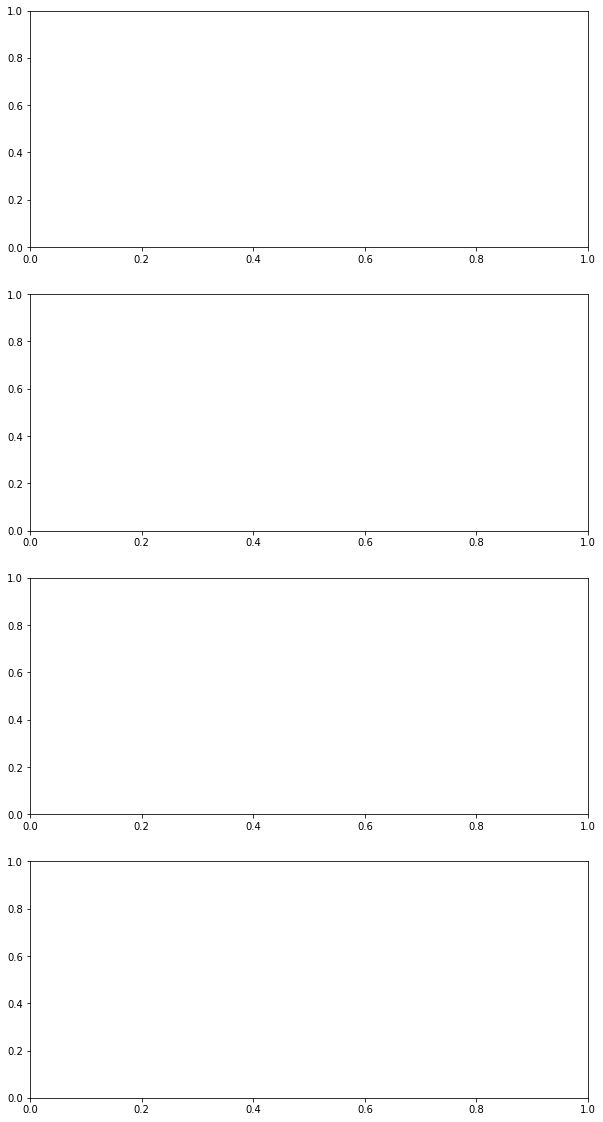

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(4,1,1)  # 2X2 자리에 1번째 자리 할당
ax2 = fig.add_subplot(4,1,2)  # 2X2 자리에 2번째 자리 할당
ax3 = fig.add_subplot(4,1,3)  # 2X2 자리에 3번째 자리 할당
ax4 = fig.add_subplot(4,1,4)  # 2X2 자리에 4번째 자리 할당

fig.set_size_inches(10,20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

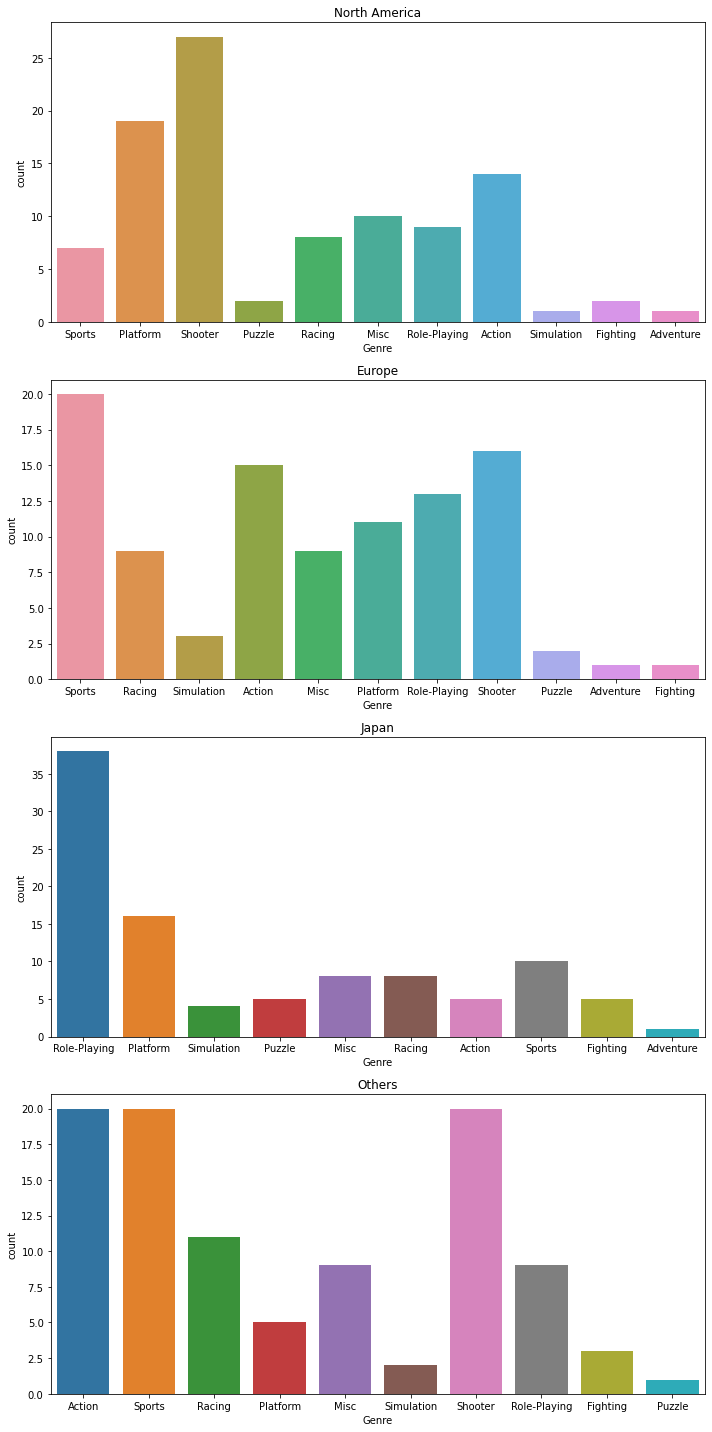

In [ ]:
sns.countplot('Genre', data=na_top100, ax=ax1)
sns.countplot('Genre', data=eu_top100, ax=ax2)
sns.countplot('Genre', data=jp_top100, ax=ax3)
sns.countplot('Genre', data=other_top100, ax=ax4)

ax1.set_title('North America')
ax2.set_title('Europe')
ax3.set_title('Japan')
ax4.set_title('Others')

fig.tight_layout()
fig

북미
Shooter         27
Platform        19
Action          14

유럽
Sports          20
Shooter         16
Action          15

일본
Role-Playing    38
Platform        16
Sports          10

기타
Sports          20
Action          20
Shooter         20

In [ ]:
### 2. 연도별 게임의 트렌드가 있을까

In [5]:
gb_year = df.groupby(['Year', 'Genre'], as_index=False).sum()
gb_year['Sales_Sum'] = (gb_year.NA_Sales + gb_year.EU_Sales + gb_year.JP_Sales + gb_year.Other_Sales)
gb_year

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,1980,Action,320000,20000,0,0,340000
1,1980,Fighting,720000,40000,0,10000,770000
2,1980,Misc,2530000,150000,0,20000,2700000
3,1980,Shooter,6560000,430000,0,80000,7070000
4,1981,Action,13860000,810000,0,120000,14790000
...,...,...,...,...,...,...,...
383,2016,Sports,4570000,7360000,780000,1920000,14630000
384,2016,Strategy,110000,320000,50000,40000,520000
385,2017,Action,0,0,10000,0,10000
386,2017,Role-Playing,0,0,40000,0,40000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


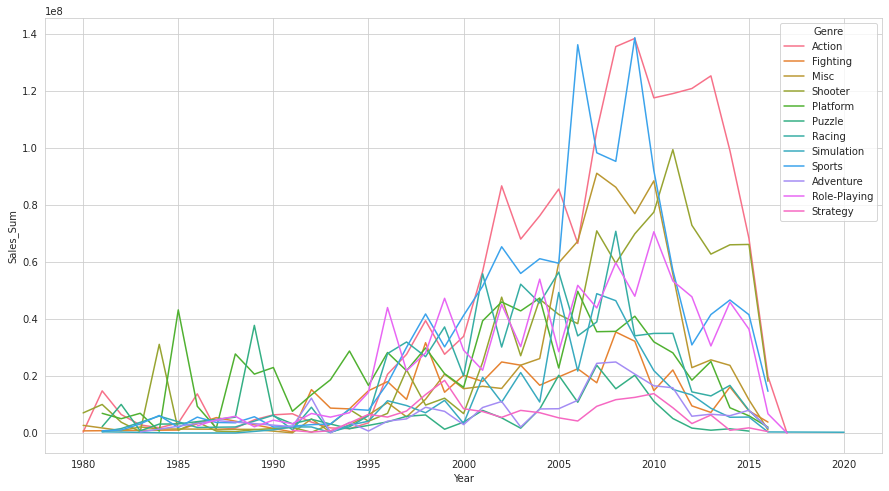

In [ ]:
# 전세계의 연도별 장르 출고량을 lineplot으로 시각화

sns.set_style('whitegrid')
plt.gcf().set_size_inches(15,8)
sns.lineplot('Year', 'Sales_Sum', data=gb_year, hue='Genre')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


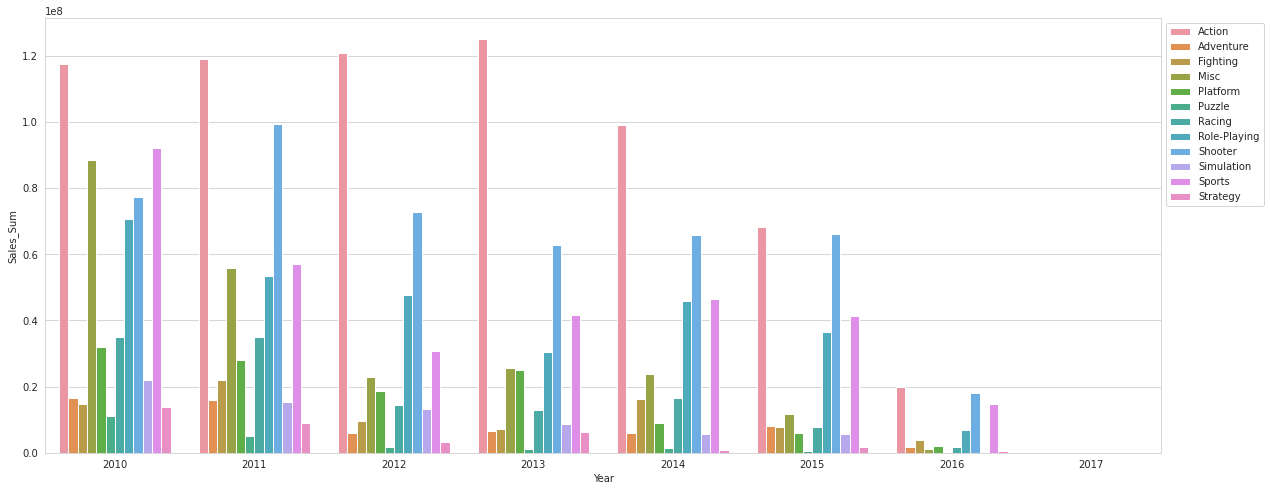

In [ ]:
# tmp1980 = gb_year[gb_year.Year < 1990]
# tmp1990 = gb_year[(gb_year.Year.values >= 1990) & (gb_year.Year.values < 2000)]
# tmp2000 = gb_year[(gb_year.Year.values >= 2000) & (gb_year.Year.values < 2010)]
# tmp2010 = gb_year[(gb_year.Year.values >= 2010) & (gb_year.Year.values < 2020)]

tmp = tmp2010.groupby(['Year','Genre'], as_index=False).sum()
sns.set_style('whitegrid')
plt.gcf().set_size_inches(20, 8)
sns.barplot('Year', 'Sales_Sum', data=tmp, hue='Genre')
plt.legend(loc = 2, bbox_to_anchor = (1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


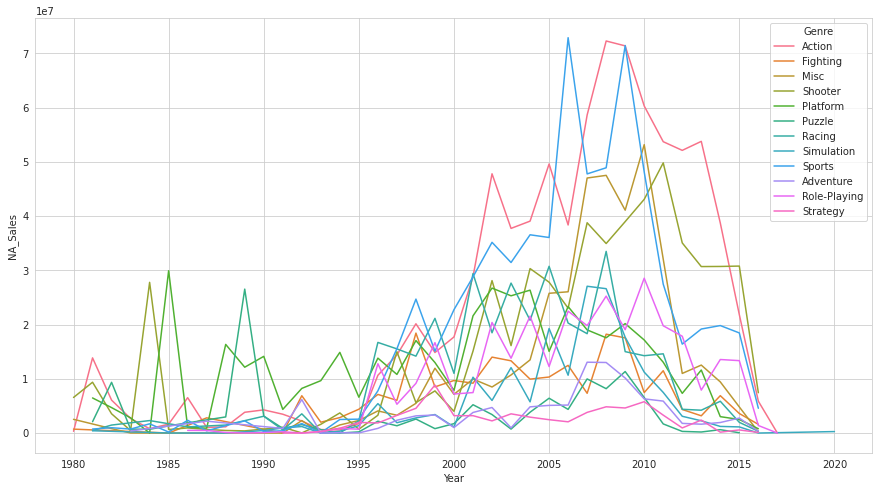

In [ ]:
# 북미권의 연도별 장르 출고량 시각화

tmp = na_df.groupby(['Year','Genre'], as_index=False).sum()
sns.set_style('whitegrid')
plt.gcf().set_size_inches(15, 8)
sns.lineplot('Year', 'NA_Sales', data=tmp, hue='Genre')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


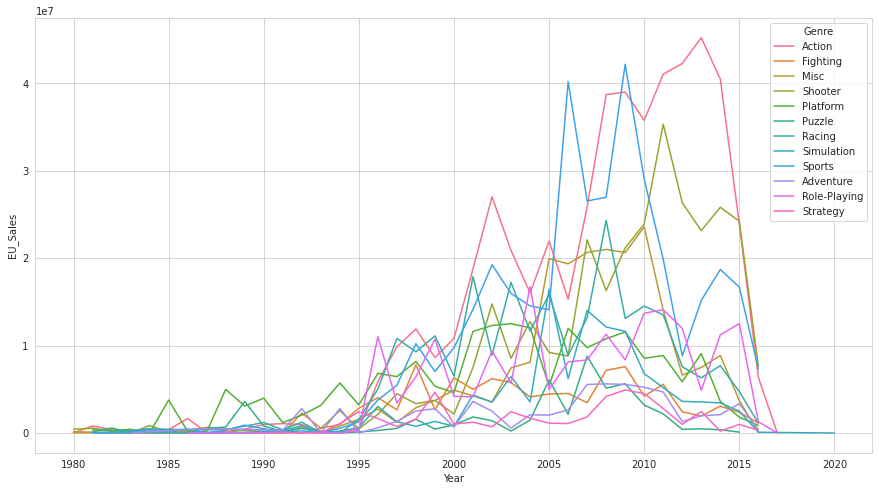

In [ ]:
# 유럽권의 연도별 장르 출고량 시각화

tmp = eu_df.groupby(['Year','Genre'], as_index=False).sum()

sns.set_style('whitegrid')
plt.gcf().set_size_inches(15, 8)
sns.lineplot('Year', 'EU_Sales', data=tmp, hue='Genre')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


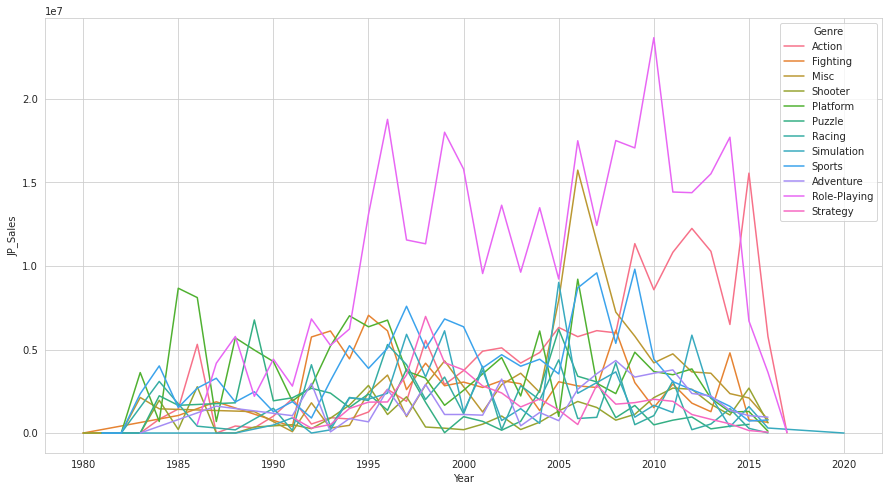

In [ ]:
# 일본의 연도별 장르 출고량 시각화

tmp = jp_df.groupby(['Year','Genre'], as_index=False).sum()
sns.set_style('whitegrid')
plt.gcf().set_size_inches(15, 8)
sns.lineplot('Year', 'JP_Sales', data=tmp, hue='Genre')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


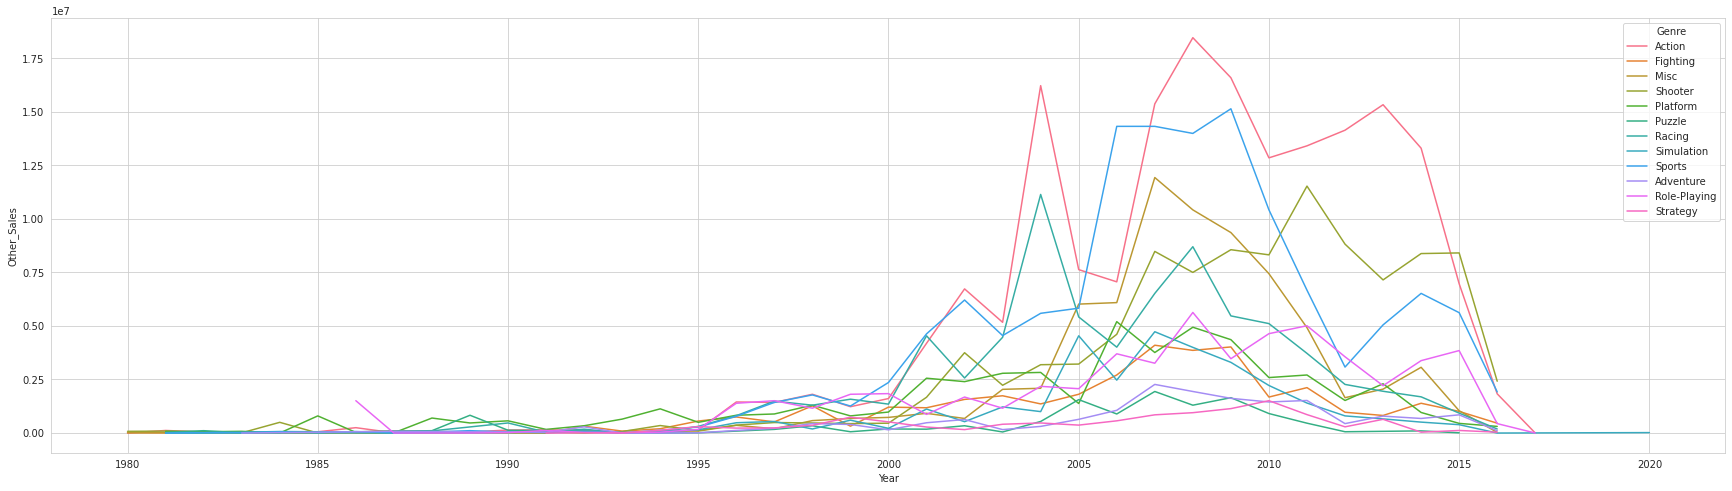

In [ ]:
# 기타 국가의 연도별 장르 출고량 시각화

tmp = other_df.groupby(['Year','Genre'], as_index=False).sum()
sns.set_style('whitegrid')
plt.gcf().set_size_inches(30,8)
sns.lineplot('Year', 'Other_Sales', data=tmp, hue='Genre')

In [ ]:
na_df.NA_Sales.sum()
# 4,307,039,988   43억 703만 9988장

4307039978

In [ ]:
eu_df.EU_Sales.sum()
# 2,393,569,988   23억 9356만 9988장

2393569988

In [ ]:
jp_df.JP_Sales.sum()
# 1,271,389,997   12억 7138만 9997장

1271389997

In [ ]:
other_df.Other_Sales.sum()
# 783,369,996   7억 8336만 9996장

783369996

In [6]:
df['Sales_Sum'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [38]:
cross = df.groupby(['Year','Genre'], as_index=False).count()
tmp = pd.crosstab(cross['Year'],cross['Genre'], values=cross['Sales_Sum'], aggfunc=np.sum)
tmp = tmp.fillna(0)
tmp.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


In [37]:
from scipy.stats import chi2_contingency

chi2 = chi2_contingency(tmp)
chi2

(2763.3426220442343,
 0.0,
 418,
 array([[1.59596084e+00, 6.24592082e-01, 4.11304723e-01, 8.28027831e-01,
         4.30022782e-01, 2.78800566e-01, 6.00455637e-01, 7.21630441e-01,
         6.30503048e-01, 4.16723108e-01, 1.13244258e+00, 3.29536359e-01],
        [9.17677483e+00, 3.59140447e+00, 2.36500216e+00, 4.76116003e+00,
         2.47263100e+00, 1.60310326e+00, 3.45261991e+00, 4.14937504e+00,
         3.62539253e+00, 2.39615787e+00, 6.51154486e+00, 1.89483406e+00],
        [7.18182378e+00, 2.81066437e+00, 1.85087125e+00, 3.72612524e+00,
         1.93510252e+00, 1.25460255e+00, 2.70205037e+00, 3.24733699e+00,
         2.83726372e+00, 1.87525399e+00, 5.09599163e+00, 1.48291361e+00],
        [3.39141678e+00, 1.32725817e+00, 8.74022536e-01, 1.75955914e+00,
         9.13798411e-01, 5.92451204e-01, 1.27596823e+00, 1.53346469e+00,
         1.33981898e+00, 8.85536605e-01, 2.40644049e+00, 7.00264762e-01],
        [2.79293147e+00, 1.09303614e+00, 7.19783265e-01, 1.44904870e+00,
         7.525

In [39]:
cross = df.groupby(['Year', 'Genre'], as_index=False).sum()
tmp = pd.crosstab(cross['Year'],cross['Genre'], values=cross.Sales_Sum, aggfunc=np.sum)
tmp = tmp.fillna(0)
tmp.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,340000.0,0.0,770000.0,2700000.0,0.0,0.0,0.0,0.0,7070000.0,0.0,0.0,0.0
1981,14790000.0,0.0,0.0,0.0,6920000.0,2250000.0,480000.0,0.0,10020000.0,440000.0,780000.0,0.0
1982,6500000.0,0.0,0.0,870000.0,5030000.0,10040000.0,1570000.0,0.0,3810000.0,0.0,1060000.0,0.0
1983,2860000.0,400000.0,0.0,2140000.0,6930000.0,780000.0,0.0,0.0,490000.0,0.0,3200000.0,0.0
1984,1850000.0,0.0,0.0,1450000.0,690000.0,3140000.0,5950000.0,0.0,31100000.0,0.0,6170000.0,0.0


In [35]:
chi2 = chi2_contingency(tmp)
chi2

(3401604553.968145,
 0.0,
 418,
 array([[2.12866188e+06, 2.90808682e+05, 5.51172047e+05, 9.68906627e+05,
         1.02891496e+06, 2.99146969e+05, 8.97888267e+05, 1.12027576e+06,
         1.27342191e+06, 4.83744993e+05, 1.62210154e+06, 2.14956354e+05],
        [6.98075882e+06, 9.53681414e+05, 1.80752009e+06, 3.17744379e+06,
         3.37423584e+06, 9.81026091e+05, 2.94454535e+06, 3.67384552e+06,
         4.17607479e+06, 1.58639902e+06, 5.31953889e+06, 7.04930395e+05],
        [5.65034514e+06, 7.71925987e+05, 1.46303756e+06, 2.57187715e+06,
         2.73116399e+06, 7.94059235e+05, 2.38336518e+06, 2.97367316e+06,
         3.38018610e+06, 1.28405840e+06, 4.30572542e+06, 5.70582674e+05],
        [3.28690438e+06, 4.49042818e+05, 8.51074484e+05, 1.49610582e+06,
         1.58876575e+06, 4.61918114e+05, 1.38644512e+06, 1.72983757e+06,
         1.96631324e+06, 7.46959180e+05, 2.50471562e+06, 3.31917899e+05],
        [9.85093068e+06, 1.34579202e+06, 2.55069049e+06, 4.48386477e+06,
         4.7615

In [ ]:
# 연도별로 장르별 총 출고량이 다름

In [ ]:
### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
# 최근 10년간(2010 ~ 2020) 출고량이 많았던 게임 장르

latest = df[df.Year >= 2010]
latest.reset_index(drop=True, inplace=True)
latest

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
1,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000,10000,0,0,30000
4,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000,30000,0,10000,80000
...,...,...,...,...,...,...,...,...,...,...
5115,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000,120000,0,20000,270000
5116,MindJack,PS3,2011,Shooter,Square Enix,70000,80000,0,30000,180000
5117,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0,0,50000,0,50000
5118,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000


In [ ]:
latest['sale_rank'] = latest['Sales_Sum'].rank(method='min', ascending=False)
latest.sort_values(by='sale_rank',inplace=True)
latest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,sale_rank
1303,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000,4940000,240000,1670000,21820000,1.0
1047,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999,2.0
3353,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000,3.0
3262,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5570000,3280000,5650000,820000,15320000,4.0
840,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2985,Exstetra,3DS,2013,Role-Playing,FuRyu,0,0,10000,0,10000,4826.0
4204,Himawari: Pebble in the Sky Portable,PSP,2010,Adventure,Kadokawa Shoten,0,0,10000,0,10000,4826.0
2978,Root Double: Before Crime After Days,X360,2012,Action,Yeti,0,0,10000,0,10000,4826.0
2969,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0,10000,0,0,10000,4826.0


In [ ]:
latest.iloc[:100].Genre.value_counts().sort_values()

Strategy         1
Fighting         2
Simulation       2
Racing           4
Platform         6
Misc             9
Role-Playing    13
Sports          13
Action          25
Shooter         25
Name: Genre, dtype: int64

In [ ]:
latest.Genre.value_counts()

Action          1434
Sports           569
Misc             561
Role-Playing     556
Adventure        538
Shooter          395
Racing           233
Simulation       206
Fighting         196
Strategy         167
Platform         150
Puzzle           115
Name: Genre, dtype: int64

In [ ]:
# 최근 10년동안 출시된 게임은 Action 장르가 가장 많았다.
# Action 장르의 게임을 많이 출시한 만큼 출고량이 그만큼 많았는지 확인해볼 것.

In [ ]:
# 최근 10년동안 출시된 게임들의 장르별 평균 출고량 계산

latest.groupby('Genre').mean()['Sales_Sum'].round().sort_values()

Genre
Adventure        113104.0
Puzzle           184174.0
Strategy         213473.0
Simulation       345097.0
Misc             408734.0
Fighting         415969.0
Action           466946.0
Role-Playing     523903.0
Racing           530644.0
Sports           569912.0
Platform         804867.0
Shooter         1171240.0
Name: Sales_Sum, dtype: float64

In [ ]:
# 제일 많이 출시했던 Action 장르의 게임별 평균 출고량은 466,946 장
# 제일 적게 출시했던 Puzzle 장르의 게임별 평균 출고량은 184,174 장

# 출시율에 비해 제일 많이 팔린 장르는 
# 1위 Shooter 장르 -> 1,171,240 장
# 2위 Platform 장르 -> 804,867 장
# 3위 Sports 장르 -> 569,912 장


In [ ]:
na_top100.iloc[:10]

,Name,Genre,Platform,Year,NA_Sales,sale_rank
2855,Wii Sports,Sports,Wii,2006,41490000,1.0
4113,Super Mario Bros.,Platform,NES,1985,29080000,2.0
10280,Duck Hunt,Shooter,NES,1984,26930000,3.0
1187,Tetris,Puzzle,GB,1989,23200000,4.0
12316,Mario Kart Wii,Racing,Wii,2008,15850000,5.0
3288,Wii Sports Resort,Sports,Wii,2009,15750000,6.0
4253,Kinect Adventures!,Misc,X360,2010,14970000,7.0
16176,New Super Mario Bros. Wii,Platform,Wii,2009,14590000,8.0
2959,Wii Play,Misc,Wii,2006,14030000,9.0
12837,Super Mario World,Platform,SNES,1990,12780000,10.0


In [ ]:
# 북미 출고량에서
# Kinect Adventures!(16), Super Mario World(19) 는 전세계 탑10 안에 들어가지 않음

In [ ]:
eu_top100.iloc[:10]

,Name,Genre,Platform,Year,EU_Sales,sale_rank
2855,Wii Sports,Sports,Wii,2006,29020000,1.0
12316,Mario Kart Wii,Racing,Wii,2008,12880000,2.0
3288,Wii Sports Resort,Sports,Wii,2009,11010000,3.0
10914,Nintendogs,Simulation,DS,2005,11000000,4.0
3414,Grand Theft Auto V,Action,PS3,2013,9270000,5.0
12950,Brain Age: Train Your Brain in Minutes a Day,Misc,DS,2005,9260000,6.0
6796,New Super Mario Bros.,Platform,DS,2006,9230000,7.0
2959,Wii Play,Misc,Wii,2006,9200000,8.0
7673,Pokemon Red/Pokemon Blue,Role-Playing,GB,1996,8890000,9.0
10681,Wii Fit Plus,Sports,Wii,2009,8590000,10.0


In [ ]:
# 유럽 출고량에서
# Nintendogs(11), Grand Theft Auto V(17), Brain Age: Train Your Brain in Minutes a Day(20), Wii Fit Plus(15)

In [ ]:
jp_top100.iloc[:10]

,Name,Genre,Platform,Year,JP_Sales,sale_rank
7673,Pokemon Red/Pokemon Blue,Role-Playing,GB,1996,10220000,1.0
9233,Pokemon Gold/Pokemon Silver,Role-Playing,GB,1999,7200000,2.0
4113,Super Mario Bros.,Platform,NES,1985,6810000,3.0
6796,New Super Mario Bros.,Platform,DS,2006,6500000,4.0
10345,Pokemon Diamond/Pokemon Pearl,Role-Playing,DS,2006,6040000,5.0
10410,Pokemon Black/Pokemon White,Role-Playing,DS,2010,5650000,6.0
10698,Pokemon Ruby/Pokemon Sapphire,Role-Playing,GBA,2002,5380000,7.0
3211,Animal Crossing: Wild World,Simulation,DS,2005,5330000,8.0
503,Brain Age 2: More Training in Minutes a Day,Puzzle,DS,2005,5320000,9.0
1817,Monster Hunter Freedom 3,Role-Playing,PSP,2010,4870000,10.0


In [ ]:
# Animal Crossing: Wild World(41), Brain Age 2: More Training in Minutes a Day(28), Monster Hunter Freedom 3(211)
# 포켓몬 순서대로 13 21 27 26

In [ ]:
other_top100.iloc[:10]

,Name,Genre,Platform,Year,Other_Sales,sale_rank
14355,Grand Theft Auto: San Andreas,Action,PS2,2004,10570000,1.0
2855,Wii Sports,Sports,Wii,2006,8460000,2.0
14351,Gran Turismo 4,Racing,PS2,2004,7530000,3.0
3414,Grand Theft Auto V,Action,PS3,2013,4139999,4.0
12316,Mario Kart Wii,Racing,Wii,2008,3310000,5.0
3288,Wii Sports Resort,Sports,Wii,2009,2960000,6.0
8052,Pro Evolution Soccer 2008,Sports,PS2,2007,2930000,7.0
6796,New Super Mario Bros.,Platform,DS,2006,2900000,8.0
2959,Wii Play,Misc,Wii,2006,2850000,9.0
10914,Nintendogs,Simulation,DS,2005,2750000,10.0


In [ ]:
# Grand Theft Auto: San Andreas(18), Gran Turismo 4(47), Grand Theft Auto V(17), Pro Evolution Soccer 2008(346), Nintendogs(11)

In [ ]:
tot_ranking = df.copy()
tot_ranking['sale_rank'] = tot_ranking['Sales_Sum'].rank(method='min', ascending=False)
tot_ranking.sort_values(by='sale_rank', inplace=True)
tot_ranking

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,sale_rank
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,1.0
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,2.0
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,3.0
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,4.0
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8543,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0,10000,0,0,10000,15484.0
1487,WRC 2: FIA World Rally Championship,PC,2011,Racing,Ubisoft,0,10000,0,0,10000,15484.0
5342,Bakumatsu Rock,PSP,2014,Action,Marvelous Entertainment,0,0,10000,0,10000,15484.0
11632,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0,10000,0,0,10000,15484.0


In [ ]:
tot_ranking.iloc[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,sale_rank
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,1.0
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,2.0
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,3.0
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,4.0
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,5.0
1187,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000,6.0
6796,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,7.0
2959,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,8.0
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000,9.0
10280,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000,10.0


In [ ]:
# 닌텐도 시리즈 장악
# Super Mario, Pokemon, Wii Sports, Brain age

In [ ]:
tot_ranking[tot_ranking.Publisher != 'Nintendo'].iloc[:100].Genre.value_counts()

Shooter         31
Action          24
Role-Playing    10
Racing           8
Misc             7
Sports           7
Platform         6
Fighting         3
Simulation       2
Adventure        1
Puzzle           1
Name: Genre, dtype: int64

In [ ]:
nintendo = tot_ranking[tot_ranking.Publisher == 'Nintendo']
nintendo[:50]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,sale_rank
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,1.0
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,2.0
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,3.0
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,4.0
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,5.0
1187,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000,6.0
6796,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,7.0
2959,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,8.0
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000,9.0
10280,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000,10.0


In [ ]:
nintendo.Genre.value_counts()

Platform        111
Role-Playing    104
Misc             99
Action           78
Puzzle           73
Sports           55
Racing           36
Adventure        35
Strategy         31
Simulation       28
Shooter          24
Fighting         18
Name: Genre, dtype: int64

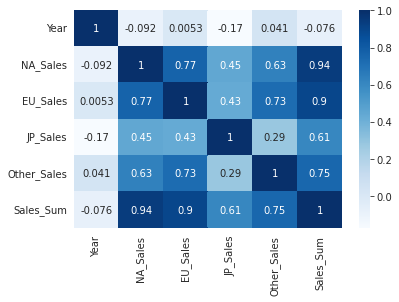

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)